In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv 
import dateutil

In [2]:
df = pd.read_csv('Data/uber-raw-data-apr14.csv')
df1 = pd.read_csv('Data/uber-raw-data-jun14.csv')
df2 =  pd.read_csv('Data/uber-raw-data-jul14.csv')
df3 =  pd.read_csv('Data/uber-raw-data-aug14.csv')
df4 =  pd.read_csv('Data/uber-raw-data-sep14.csv')

In [3]:
df = df.rename(columns = {'Date/Time': 'DateTime'})
df1 = df1.rename(columns = {'Date/Time': 'DateTime'})
df2 = df2.rename(columns = {'Date/Time': 'DateTime'})
df3 = df3.rename(columns = {'Date/Time': 'DateTime'})
df4 = df4.rename(columns = {'Date/Time': 'DateTime'})


In [4]:
df["DateTime"] = pd.to_datetime(df.DateTime)
df1["DateTime"] = pd.to_datetime(df1.DateTime)
df2["DateTime"] = pd.to_datetime(df2.DateTime)
df3["DateTime"] = pd.to_datetime(df3.DateTime)
df4["DateTime"] = pd.to_datetime(df4.DateTime)

In [5]:
df11 = pd.read_csv('Data/uber-raw-data-may14.csv')
df11 = df11.rename(columns = {'Date/Time': 'DateTime'})
df11["DateTime"] = pd.to_datetime(df11.DateTime)

In [7]:
frame = [df, df11, df1, df2, df3, df4]
result = pd.concat(frame)

In [8]:
result.shape

(4534327, 4)

In [10]:
result.tail()
dfTemp = result

In [13]:
result['Date'] = result['DateTime'].apply(lambda x: x.strftime('%m/%d/%Y'))

In [14]:
result['Index_Weekday'] = pd.to_datetime(result['DateTime'])
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
result['Index_Weekday'] = result['Index_Weekday'].dt.dayofweek
result['Weekday'] = result['Index_Weekday'].apply(lambda x: days[x])

In [15]:
result.tail()

,DateTime,Lat,Lon,Base,Index_Weekday,Date,Weekday
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,1,09/30/2014,Tuesday
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,1,09/30/2014,Tuesday
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,1,09/30/2014,Tuesday
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,1,09/30/2014,Tuesday
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,1,09/30/2014,Tuesday


In [16]:
dfWeather= pd.read_csv('Data/Weather NYC 2014 April onwards.csv')
dfWeather.head()

,Date,Temp,Conditions
0,04/01/2014,50,NaN
1,04/02/2014,48,NaN
2,04/03/2014,57,Unfavorable
3,04/04/2014,44,Unfavorable
4,04/05/2014,47,Unfavorable


In [17]:
dfWeather = dfWeather.fillna('Normal')

In [18]:
result = result.merge(dfWeather, on='Date', how='left')
result.head()

,DateTime,Lat,Lon,Base,Index_Weekday,Date,Weekday,Temp,Conditions
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,04/01/2014,Tuesday,50,Normal
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,04/01/2014,Tuesday,50,Normal
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,04/01/2014,Tuesday,50,Normal
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,04/01/2014,Tuesday,50,Normal
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,04/01/2014,Tuesday,50,Normal


In [19]:
result.to_csv('Data/merged_UberTest.csv')

In [20]:
groupByKeysDate = result['Date']
result.Date.value_counts().sort_index()
dfAggValues = pd.DataFrame(result.Date.value_counts().sort_index().reset_index())
dfAggValues = dfAggValues.rename(columns={'index':'Date','Date':'Count'})
dfAggValues.columns

Index([u'Date', u'Count'], dtype='object')

In [21]:
dfAggValues['Index_Weekday'] = pd.to_datetime(dfAggValues['Date'])
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dfAggValues['Index_Weekday'] = dfAggValues['Index_Weekday'].dt.dayofweek
dfAggValues['Weekday'] = dfAggValues['Index_Weekday'].apply(lambda x: days[x])

In [22]:
dfAggValues

,Date,Count,Index_Weekday,Weekday
0,04/01/2014,14546,1,Tuesday
1,04/02/2014,17474,2,Wednesday
2,04/03/2014,20701,3,Thursday
3,04/04/2014,26714,4,Friday
4,04/05/2014,19521,5,Saturday
5,04/06/2014,13445,6,Sunday
6,04/07/2014,19550,0,Monday
7,04/08/2014,16188,1,Tuesday
8,04/09/2014,16843,2,Wednesday
9,04/10/2014,20041,3,Thursday


In [23]:
dfAggValues = dfAggValues.merge(dfWeather, on='Date', how='left')

In [24]:
dfAggValues.head()

,Date,Count,Index_Weekday,Weekday,Temp,Conditions
0,04/01/2014,14546,1,Tuesday,50,Normal
1,04/02/2014,17474,2,Wednesday,48,Normal
2,04/03/2014,20701,3,Thursday,57,Unfavorable
3,04/04/2014,26714,4,Friday,44,Unfavorable
4,04/05/2014,19521,5,Saturday,47,Unfavorable


In [25]:
dfAvgValuesMultiGroup = pd.DataFrame(dfAggValues.groupby(['Weekday', 'Conditions'], as_index=False)['Count'].mean())
dfAvgValuesMultiGroup

,Weekday,Conditions,Count
0,Friday,Normal,29395.555556
1,Friday,Unfavorable,26502.375000
2,Monday,Normal,19954.047619
3,Monday,Unfavorable,24487.400000
4,Saturday,Normal,24033.470588
5,Saturday,Unfavorable,26393.888889
6,Sunday,Normal,17828.500000
7,Sunday,Unfavorable,22268.333333
8,Thursday,Normal,30216.000000
9,Thursday,Unfavorable,27676.750000


In [26]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapDays = {day: i for i, day in enumerate(days)}
key = dfAvgValuesMultiGroup['Weekday'].map(mapDays)
key
dfAvgValuesMultiGroup = dfAvgValuesMultiGroup.iloc[key.argsort()].set_index('Weekday')
dfAvgValuesMultiGroup

,Conditions,Count
Weekday,,
Monday,Normal,19954.047619
Monday,Unfavorable,24487.400000
Tuesday,Normal,23864.647059
Tuesday,Unfavorable,25809.000000
Wednesday,Normal,26232.555556
Wednesday,Unfavorable,28037.750000
Thursday,Normal,30216.000000
Thursday,Unfavorable,27676.750000
Friday,Normal,29395.555556


In [29]:
dfTotal = dfAvgValuesMultiGroup.reset_index()
dfTotal = dfTotal.pivot_table('Count', ['Weekday'], 'Conditions')
dfTotal

Conditions,Normal,Unfavorable
Weekday,,
Friday,29395.555556,26502.375000
Monday,19954.047619,24487.400000
Saturday,24033.470588,26393.888889
Sunday,17828.500000,22268.333333
Thursday,30216.000000,27676.750000
Tuesday,23864.647059,25809.000000
Wednesday,26232.555556,28037.750000


In [30]:
dfTotal = dfTotal.reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapDays = {day: i for i, day in enumerate(days)}
key = dfTotal['Weekday'].map(mapDays)
key
dfTotal = dfTotal.iloc[key.argsort()].set_index('Weekday')

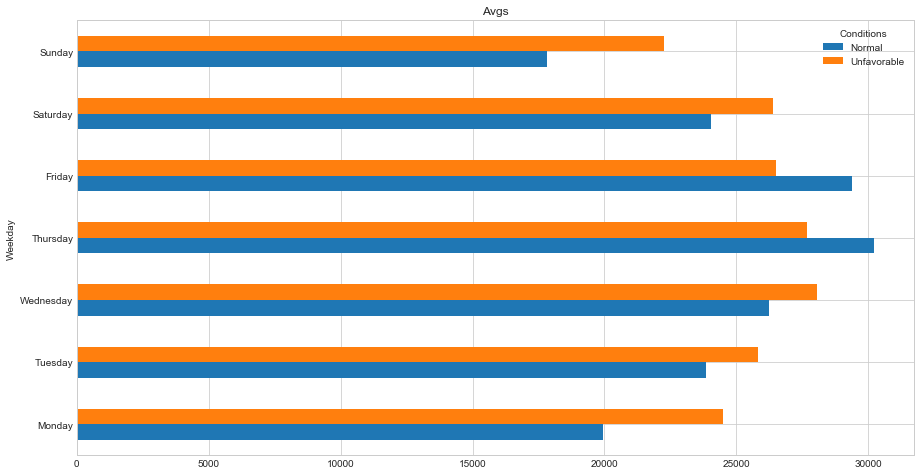

In [32]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (15, 8)
dfTotal.plot(kind='barh', title='Avgs')

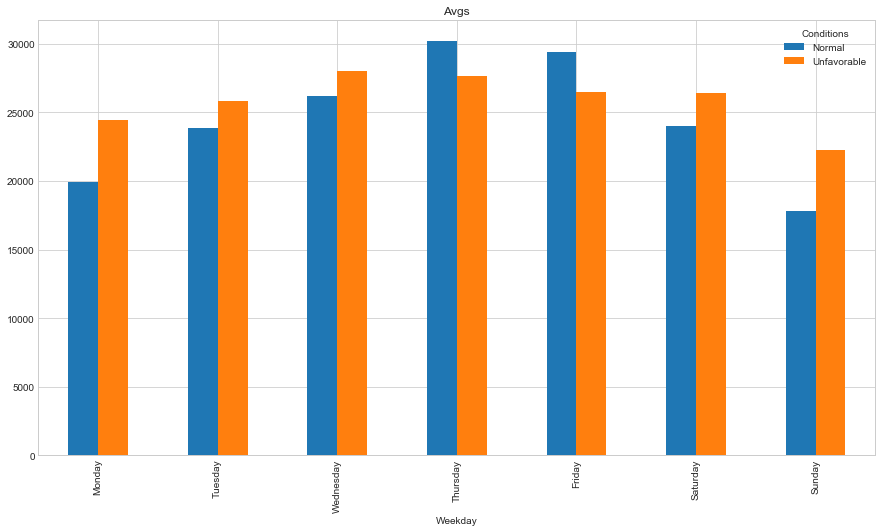

In [33]:
dfTotal.plot(kind='bar', title='Avgs')

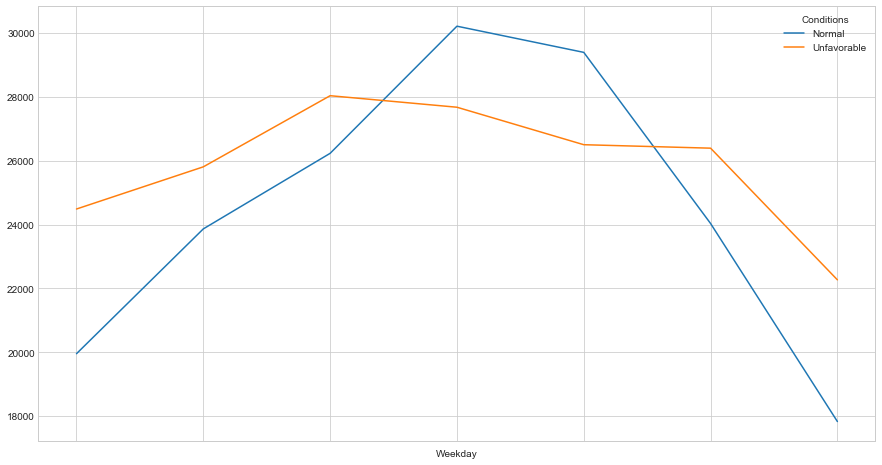

In [34]:
dfTotal.plot()

In [58]:
dfTaxi = pd.read_csv('Data/Yellow Cab Spark Agg.csv')

In [59]:
dfTaxi.dtypes

Date     object
Count     int64
dtype: object

In [60]:
dfTaxi["Date"] = pd.to_datetime(dfTaxi.Date, format="%Y-%m-%d")

In [63]:
dfTaxi['Date'] = dfTaxi['Date'].apply(lambda x: x.strftime('%m/%d/%Y'))

In [64]:
dfWeatherTaxi = pd.read_csv('Data/Weather NYC 2016.csv')

In [65]:
dfWeatherTaxi.head()
dfWeatherTaxi = dfWeatherTaxi.fillna('Normal')
dfWeatherTaxi.head()

,Date,DateVal,Temp,Conditions
0,01/01/2016,1,38,Normal
1,01/02/2016,2,36,Normal
2,01/03/2016,3,40,Normal
3,01/04/2016,4,25,Normal
4,01/05/2016,5,20,Normal


In [66]:
dfTaxi = dfTaxi.merge(dfWeatherTaxi, on='Date', how='left')

In [67]:
dfTaxi.head()

,Date,Count,DateVal,Temp,Conditions
0,01/01/2016,345037,1,38,Normal
1,01/02/2016,312831,2,36,Normal
2,01/03/2016,302878,3,40,Normal
3,01/04/2016,316171,4,25,Normal
4,01/05/2016,343251,5,20,Normal


In [69]:
dfTaxi['Index_Weekday'] = pd.to_datetime(dfTaxi['Date'])
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dfTaxi['Index_Weekday'] = dfTaxi['Index_Weekday'].dt.dayofweek
dfTaxi['Weekday'] = dfTaxi['Index_Weekday'].apply(lambda x: days[x])

In [70]:
dfTaxi.head()

,Date,Count,DateVal,Temp,Conditions,Index_Weekday,Weekday
0,01/01/2016,345037,1,38,Normal,4,Friday
1,01/02/2016,312831,2,36,Normal,5,Saturday
2,01/03/2016,302878,3,40,Normal,6,Sunday
3,01/04/2016,316171,4,25,Normal,0,Monday
4,01/05/2016,343251,5,20,Normal,1,Tuesday


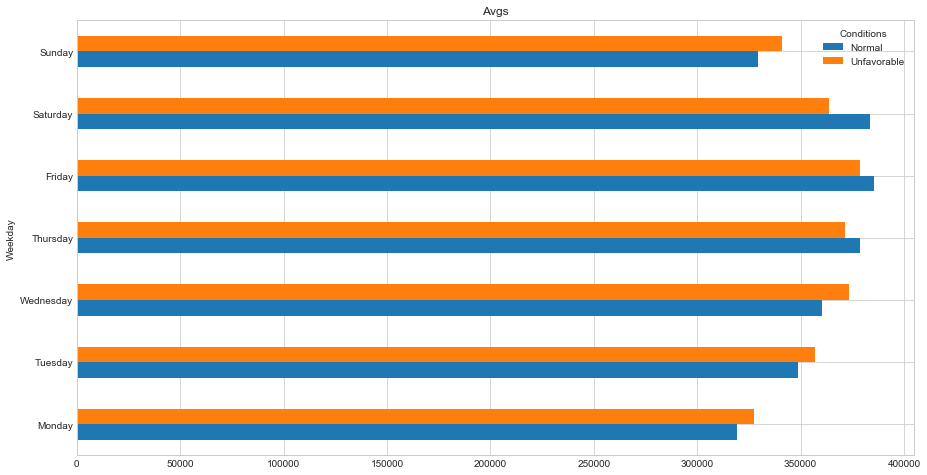

In [71]:
dfAvgValuesMultiGroupTaxi = pd.DataFrame(dfTaxi.groupby(['Weekday', 'Conditions'], as_index=False)['Count'].mean())
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapDays = {day: i for i, day in enumerate(days)}
key = dfAvgValuesMultiGroupTaxi['Weekday'].map(mapDays)
dfAvgValuesMultiGroupTaxi = dfAvgValuesMultiGroupTaxi.iloc[key.argsort()].set_index('Weekday')
dfTotalTaxi = dfAvgValuesMultiGroupTaxi.reset_index()
dfTotalTaxi = dfTotalTaxi.pivot_table('Count', ['Weekday'], 'Conditions')
dfTotalTaxi = dfTotalTaxi.reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapDays = {day: i for i, day in enumerate(days)}
key = dfTotalTaxi['Weekday'].map(mapDays)
dfTotalTaxi = dfTotalTaxi.iloc[key.argsort()].set_index('Weekday')
dfTotalTaxi.plot(kind='barh', title='Avgs')

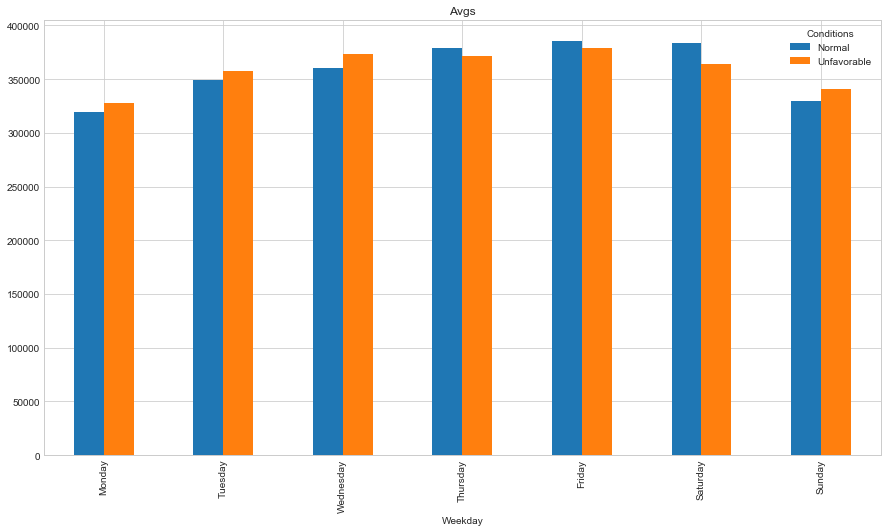

In [74]:
dfTotalTaxi.plot(kind='bar', title='Avgs')

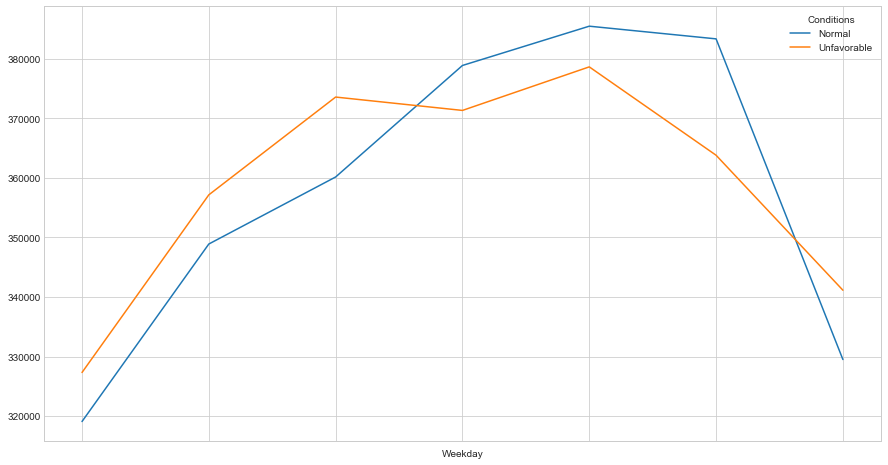

In [75]:
dfTotalTaxi.plot()